In [127]:
import pandas as pd
from sklearn.model_selection import train_test_split
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.api as sm
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
import joblib
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


In [128]:
df = pd.read_csv('dados_treino_statsmodel.csv', sep='|')
df.head()

,ATENDIMENTOS,DT_ATENDIMENTO
0,126,2022-01-01
1,139,2022-01-02
2,129,2022-01-03
3,91,2022-01-04
4,117,2022-01-05


In [129]:
df.set_index('DT_ATENDIMENTO', inplace=True)

model = sm.tsa.SimpleExpSmoothing(df['ATENDIMENTOS'])
ses_model = model.fit(smoothing_level=0.3)
df['Forecast'] = ses_model.fittedvalues

df.head()



# joblib.dump(logistic_regression, "dados_treino_2022.pkl")

/home/caue/.local/share/virtualenvs/datasaude-ml-3sD6oy_M/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/caue/.local/share/virtualenvs/datasaude-ml-3sD6oy_M/lib/python3.11/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


,ATENDIMENTOS,Forecast
DT_ATENDIMENTO,,
2022-01-01,126,126.000
2022-01-02,139,126.000
2022-01-03,129,129.900
2022-01-04,91,129.630
2022-01-05,117,118.041


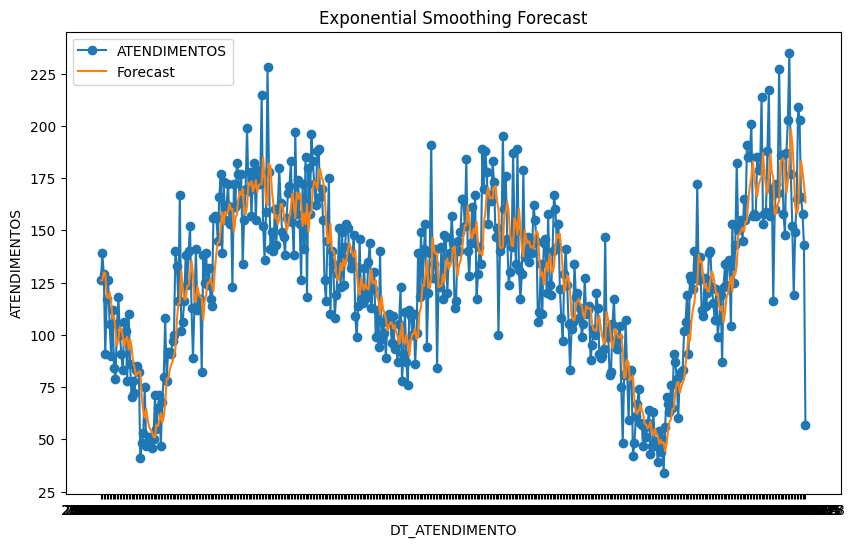

In [130]:
plt.figure(figsize=(10, 6))
plt.plot(df['ATENDIMENTOS'], label='ATENDIMENTOS', marker='o')
plt.plot(df['Forecast'], label='Forecast')
plt.xlabel('DT_ATENDIMENTO')
plt.ylabel('ATENDIMENTOS')
plt.title('Exponential Smoothing Forecast')
plt.legend()
plt.show()

In [134]:
dias_futuros=30 
forecast = ses_model.forecast(steps=dias_futuros)
# print(forecast)
forecast_df = pd.DataFrame({
    'DT_ATENDIMENTO': forecast.index.strftime('%Y-%m-%d'),
    'ATENDIMENTOS': None,
    'Forecast': forecast.values
})
forecast_df.set_index('DT_ATENDIMENTO', inplace=True)
# forecast_df.head()
df_plot = pd.concat([df, forecast_df], ignore_index=False)
# df_plot.head()
df_plot.tail()



,ATENDIMENTOS,Forecast
DT_ATENDIMENTO,,
2023-05-24,0,131.420303
2023-05-25,0,131.420303
2023-05-26,0,131.420303
2023-05-27,0,131.420303
2023-05-28,0,131.420303


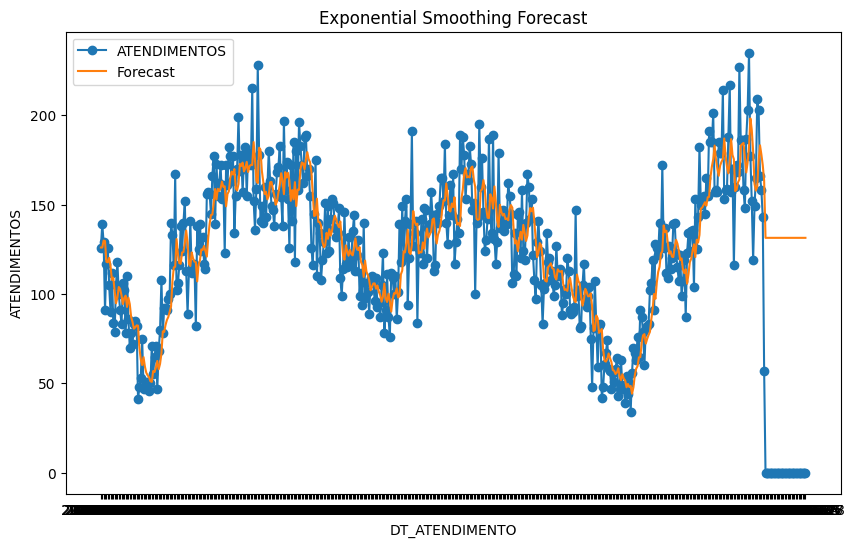

In [135]:
import matplotlib.pyplot as plt



plt.figure(figsize=(10, 6))
plt.plot(df_plot['ATENDIMENTOS'], label='ATENDIMENTOS', marker='o')
plt.plot(df_plot['Forecast'], label='Forecast')
plt.xlabel('DT_ATENDIMENTO')
plt.ylabel('ATENDIMENTOS')
plt.title('Exponential Smoothing Forecast')
plt.legend()
plt.show()